In [1]:
from sklearn.model_selection import KFold
import random
import numpy as np
from sklearn.preprocessing import StandardScaler
import function
import matplotlib.pyplot as plt
import math
import tqdm
import optuna

In [2]:
p_1=50
p_2=50
n=150
r_J_or=1
r_1_or=1
r_2_or=1
r_prop=1.0
w_J=5.0
w_1=5.0
w_2=5.0
X1_erro=0.001
X2_erro=0.001
y_erro=0.001

In [3]:
X_1_al,X_2_al,y_al=function.gene_data(p_1,p_2,n,r_J_or,r_1_or,r_2_or,r_prop,w_J,w_1,w_2,X1_erro,X2_erro,y_erro)

In [4]:
X_1_original=X_1_al[:,:100]
X_2_original=X_2_al[:,:100]
y_original=y_al[:,:100]

X_1_test=X_1_al[:,100:150]
X_2_test=X_2_al[:,100:150]
y_test=y_al[:,100:150]

In [5]:
df_tra=np.row_stack((X_1_original,X_2_original,y_original))
df_tes=np.row_stack((X_1_test,X_2_test,y_test))

## W-sJIVE-decompositionを実装

In [6]:
times=100
threshold=10
r_J=40
r_1=40
r_2=40


In [7]:
erro_lis,erro_best,S_J_best,U_1_best,U_2_best,S_1_best,W_1_best,S_2_best,W_2_best,sigma_J_best,sigma_1_best,sigma_2_best,hat_X_best=function.W_sJIVE_decompositon_1(
    times=times,r_J=r_J,r_1=r_1,r_2=r_2,X_1_or=X_1_original,X_2_or=X_2_original,threshold=threshold
)


  1%|          | 1/100 [00:00<00:07, 13.35it/s]


In [8]:
times=100
threshold=10
lam_J=1.0
lam_1=0.1
lam_2=0.1
gamma=5.0

In [9]:
erro_y_lis,erro_best,theta_1_best,theta_21_best,theta_22_best,hat_y_best=function.W_sJIVE_decomposition_2(
    y_original,threshold,times,lam_J,lam_1,lam_2,gamma,S_J_best,S_1_best,S_2_best,sigma_J_best,sigma_1_best,sigma_2_best
)

  0%|          | 0/100 [00:00<?, ?it/s]


In [15]:
erro_best

4.021995314788719

In [10]:
theta_22_best

array([ 0.01560633, -0.06409866, -0.05835796,  0.0152736 ,  0.00190164,
        0.06300792, -0.01480541,  0.0891107 ,  0.00983359, -0.06037493,
        0.04272713, -0.03300803, -0.06919981, -0.02684859,  0.0974871 ,
        0.01490795, -0.0460073 , -0.05010652, -0.02957517, -0.0171221 ,
        0.01967683,  0.05789981, -0.03201895, -0.02900264,  0.05271024,
        0.05672414, -0.02229109, -0.07850903, -0.05407108, -0.09515898,
        0.06178424,  0.06025516, -0.0280685 ,  0.00783088, -0.09399653,
       -0.05226477, -0.03563382,  0.0780883 ,  0.09543106, -0.02173519])

In [14]:
erro_y_lis

[4.021995314788719]

In [22]:
y_original

array([[-1.72522143e+00, -9.51689285e-01, -5.79189334e-01,
        -2.34582562e+00, -1.24158323e+00, -8.55086640e-01,
         1.37112446e+00,  3.05221597e-01, -4.20228473e-01,
        -1.47720475e+00,  1.28822572e+00,  1.24710048e+00,
         7.97515096e-01,  2.79772772e-01, -7.73326863e-01,
         1.58709746e+00, -4.84176916e-01, -1.85157883e+00,
        -1.50747222e+00, -5.12542065e-01,  1.00594468e-01,
        -8.91362944e-01,  1.18900687e+00, -2.22581452e-02,
        -1.16004156e-01, -1.42222790e+00,  1.23523728e+00,
         1.56902745e+00, -1.14685188e+00, -1.46017586e+00,
         1.02918982e+00,  1.11827071e+00,  2.28187984e-01,
        -6.29639606e-01,  1.36723863e+00, -9.46236752e-02,
         1.34290473e+00, -8.71440693e-01, -1.18293990e-01,
         4.08413781e-01, -6.33400656e-01,  1.70332009e+00,
        -9.46456129e-02, -1.39898302e+00,  5.22465816e-01,
        -1.15906832e+00,  1.49634506e+00, -4.43645773e-01,
        -1.08948842e+00, -5.15650381e-01, -4.11019893e-0

In [12]:
hat_y_best

array([-0.07902246, -0.49323656, -0.29047893, -0.40653819, -0.57785909,
       -0.41469138, -0.51591896, -0.4728063 , -0.4762577 , -0.42889521,
       -0.64888835, -0.47080946, -0.56266119, -0.41943792, -0.2857392 ,
       -0.56990043, -0.48451857, -0.17413098, -0.10554243, -0.27828294,
       -0.12389688, -0.58079707, -0.44797593, -0.47176902, -0.45289406,
       -0.50137373, -0.5723481 , -0.65295982, -0.54726509, -0.42727329,
       -0.44472616, -0.25356104, -0.41990033, -0.51053326, -0.37961178,
       -0.54612089, -0.10457963, -0.5730697 , -0.29814311, -0.32965996,
       -0.36582044, -0.48242148, -0.4015224 , -0.44026026, -0.44392967,
       -0.46145427, -0.41013193, -0.62434355, -0.13395632, -0.39698163,
       -0.60802534, -0.30161831, -0.13464542, -0.50212516, -0.49366332,
       -0.34939575, -0.59685422, -0.53394986, -0.42532333, -0.31668439,
       -0.19893247, -0.39320467, -0.22891972, -0.73235785, -0.01980693,
       -0.07102456, -0.62537908, -0.30038958, -0.61454104, -0.31

In [8]:
erro_lis

[4567.866976577645,
 4312.692681454448,
 4310.835798385621,
 4315.40516321,
 4315.303064590938,
 4321.907920926571,
 287.46846702577284,
 2565.917791893986,
 2529.794449458998,
 2531.7237789471314,
 2509.275209817256,
 2517.0980460042424,
 277.4360434593526,
 1431.2085045395918,
 1412.882242606637,
 1435.14926542061,
 1418.0826519279326,
 1411.1142476836005,
 279.93021189604013,
 2456.8887488272894,
 2429.23840246467,
 2444.273549025437,
 2422.5047035644607,
 2423.3453903462632,
 110.54048583755812,
 2526.7799206966997,
 2526.6455713851215,
 2526.384420564009,
 2520.3053584962427,
 2522.6086824201398,
 48.6907100524585,
 1716.156387529531,
 1716.3140111088828,
 1716.635401003238,
 1709.5718486720132,
 1709.4075140706527,
 19.40222260979413,
 1957.4414857729282,
 1956.8165234417518,
 1956.975325950892,
 1955.5321967550967,
 1955.4827679184286,
 157.11559560572792,
 2714.4581534692297,
 2559.3462383252313,
 2561.4771805351565,
 2455.582211804876,
 2458.427186271423,
 64.15559017337753,
 

<function matplotlib.pyplot.show(close=None, block=None)>

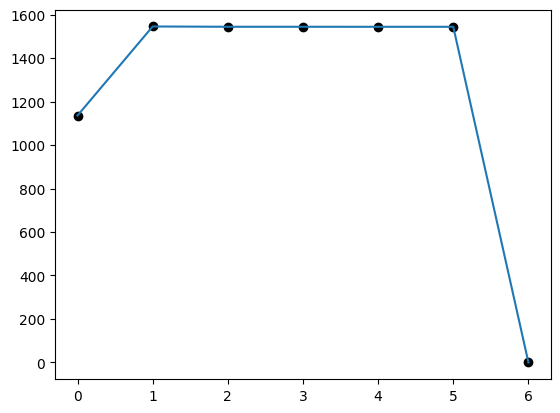

In [13]:
plt.plot(erro_lis)
plt.scatter(range(len(erro_lis)),erro_lis,color="black")
plt.show

In [85]:
X_1_original

array([[-0.29845171, -0.89744501, -0.23809323, ..., -1.6990475 ,
         0.04697075,  0.90189261],
       [-1.27477314, -1.24162585, -1.58048151, ..., -1.47910947,
        -1.28544742, -1.46894868],
       [ 0.86737528,  0.62127593, -0.21955042, ..., -1.4995324 ,
         0.87354058, -1.02409157],
       ...,
       [-0.10603512,  0.43471115, -0.60791953, ..., -0.37729193,
        -0.48001204,  0.07107349],
       [ 0.76170541,  0.46674702, -0.00601132, ..., -0.49972528,
         0.43931901, -0.87053262],
       [ 0.14250803,  1.17529991, -1.37964628, ..., -0.07236468,
        -0.79558119, -1.1500537 ]])

In [86]:
S_1_best

array([[ 2.91289548e-01, -2.32712359e+00, -1.75944844e-01,
        -1.54912549e-01, -7.53562467e-01,  1.64368087e+00,
         1.30367763e+00,  1.70268134e+00,  8.31685065e-01,
        -3.79838661e-01,  1.00296393e+00, -1.67289185e+00,
         1.19990037e+00,  1.00003067e+00,  1.56321842e+00,
         1.34043533e+00,  1.88961320e-01, -1.12288849e-01,
        -1.60912947e+00,  9.09188403e-01, -1.51669026e+00,
        -1.80191202e+00, -1.11555843e+00, -7.45584045e-01,
        -8.72627795e-01, -1.85648555e+00,  7.97414045e-01,
        -1.91138655e+00,  3.58232683e+00, -2.94268843e+00,
         9.35922390e-01,  9.72583761e-01, -1.52783366e+00,
         3.15952770e-01, -9.49081103e-01,  8.37045575e-01,
        -3.86712498e-02, -4.00385167e-01,  1.30928834e+00,
         1.00611663e+00, -2.10362938e+00, -6.71268864e-01,
         1.14308343e+00,  6.68408310e-01, -6.10307485e-01,
        -2.11285715e-01, -2.84479632e+00, -1.24440336e+00,
         1.57922758e+00,  5.73082699e-01,  4.18854426e-0

## W-sJIVE-predictionを実装

In [60]:
theta_1=theta_1_best=np.random.uniform(low=-0.1, high=0.1, size=int(r_J))
theta_21=theta_21_best=np.random.uniform(low=-0.1, high=0.1, size=int(r_1))
theta_22=theta_22_best=np.random.uniform(low=-0.1, high=0.1, size=int(r_2))

In [61]:
j=0
lam=2.0
gamma=5.0
#(j=0,1,...,r_J)

## theta_1の更新

In [62]:
pcLasso_sigma_J=[]
for i in range(len(sigma_J_best)):
    a_i=sigma_J_best[0]**2-sigma_J_best[i]**2
    pcLasso_sigma_J.append(a_i)
diag_sigma_J_final=np.diag(pcLasso_sigma_J)
diag_sigma_J_final_r_J=diag_sigma_J_final[:r_J,:r_J]

In [63]:
for j in range(r_J):
    theta_1_del_j=np.delete(theta_1,j)
    S_J_best_del_j=np.delete(S_J_best,j,axis=0)
    S_J_best_j=S_J_best[j]
    z=(y_original-theta_21.dot(S_1_best)-theta_22.dot(S_2_best)-theta_1_del_j.dot(S_J_best_del_j)).dot(S_J_best_j.T)
    if z<0:
        if np.absolute(z)>lam:
            theta_1[j]=-(np.absolute(z)-lam)/(np.linalg.norm(S_J_best_j,ord=2)**2+gamma*diag_sigma_J_final_r_J[j,j])
        elif np.absolute(z)<=lam:
            theta_1[j]=0
    else:
        if np.absolute(z)>lam:
            theta_1[j]=(np.absolute(z)-lam)/(np.linalg.norm(S_J_best_j,ord=2)**2+gamma*diag_sigma_J_final_r_J[j,j])
        elif np.absolute(z)<=lam:
            theta_1[j]=0






In [64]:
for j in range(r_J):
    print(diag_sigma_J_final_r_J[j,j])

0.0
3825.437888418157
4159.772013224262
4227.252951026056
4356.9793369052795
4415.490028460843
4476.3431989736955
4500.3086100009905
4543.059546977784
4573.690152574454


In [65]:
for j in range(r_J):
    print(np.linalg.norm(S_J_best[j],ord=2)**2)

4840.649851870971
1015.1585476175939
680.7477196266491
613.2513144979162
483.57624575741744
425.05555001698497
364.1769272464325
339.40131119639165
297.21725510688424
267.024835752565


In [66]:
theta_1

array([ 0.01740304, -0.00052832,  0.00346735, -0.00088693,  0.00120415,
        0.00568784, -0.00065635, -0.00191245,  0.00012901,  0.        ])

## theta_21の推定

In [67]:
pcLasso_sigma_1=[]
for i in range(len(sigma_1_best)):
    a_i=sigma_1_best[0]**2-sigma_1_best[i]**2
    pcLasso_sigma_1.append(a_i)
diag_sigma_1_final=np.diag(pcLasso_sigma_1)
diag_sigma_1_final_r_1=diag_sigma_1_final[:r_1,:r_1]

In [89]:
for j in range(r_1):
    theta_21_del_j=np.delete(theta_21,j)
    S_1_best_del_j=np.delete(S_1_best,j,axis=0)
    S_1_best_j=S_1_best[j]
    z=(y_original-theta_1.dot(S_J_best)-theta_22.dot(S_2_best)-theta_21_del_j.dot(S_1_best_del_j)).dot(S_1_best_j.T)
    if z<0:
        if np.absolute(z)>lam:
            theta_21[j]=-(np.absolute(z)-lam)/(np.linalg.norm(S_1_best_j,ord=2)**2+gamma*diag_sigma_1_final_r_1[j,j])
        elif np.absolute(z)<=lam:
            theta_21[j]=0
    else:
        if np.absolute(z)>lam:
            theta_21[j]=(np.absolute(z)-lam)/(np.linalg.norm(S_1_best_j,ord=2)**2+gamma*diag_sigma_1_final_r_1[j,j])
        elif np.absolute(z)<=lam:
            theta_21[j]=0

In [91]:
theta_21

array([ 1.43555649e+01,  4.46257031e+00,  2.45866480e+00, -1.66920381e-01,
        1.14683353e-01, -6.32826785e-02,  3.05671839e-02, -1.27550825e-02,
       -2.56515127e-02,  8.81561950e-03])

## theta22の推定

In [92]:
pcLasso_sigma_2=[]
for i in range(len(sigma_2_best)):
    a_i=sigma_2_best[0]**2-sigma_2_best[i]**2
    pcLasso_sigma_2.append(a_i)
diag_sigma_2_final=np.diag(pcLasso_sigma_2)
diag_sigma_2_final_r_2=diag_sigma_2_final[:r_2,:r_2]

In [93]:
for j in range(r_2):
    theta_22_del_j=np.delete(theta_22,j)
    S_2_best_del_j=np.delete(S_2_best,j,axis=0)
    S_2_best_j=S_2_best[j]
    z=(y_original-theta_1.dot(S_J_best)-theta_21.dot(S_1_best)-theta_22_del_j.dot(S_2_best_del_j)).dot(S_2_best_j.T)
    if z<0:
        if np.absolute(z)>lam:
            theta_22[j]=-(np.absolute(z)-lam)/(np.linalg.norm(S_2_best_j,ord=2)**2+gamma*diag_sigma_2_final_r_2[j,j])
        elif np.absolute(z)<=lam:
            theta_22[j]=0
    else:
        if np.absolute(z)>lam:
            theta_22[j]=(np.absolute(z)-lam)/(np.linalg.norm(S_2_best_j,ord=2)**2+gamma*diag_sigma_2_final_r_2[j,j])
        elif np.absolute(z)<=lam:
            theta_22[j]=0

In [94]:
theta_22

array([-1.47735644e+01, -9.79656384e-02, -3.54994484e-03, -4.14932284e-03,
        0.00000000e+00,  2.79403588e-03, -2.63748267e-04,  1.62923314e-04,
        0.00000000e+00,  0.00000000e+00])

In [96]:
hat_y=theta_1.dot(S_J_best)+theta_21.dot(S_1_best)+theta_22.dot(S_2_best)
np.linalg.norm(y_original-hat_y,ord=2)**2

507.9562948952406

In [97]:
lam=2.0
gamma=5.0

In [39]:
erro_y_lis=[]
theta_1=theta_1_best=np.random.uniform(low=-0.1, high=0.1, size=int(r_J))
theta_21=theta_21_best=np.random.uniform(low=-0.1, high=0.1, size=int(r_1))
theta_22=theta_22_best=np.random.uniform(low=-0.1, high=0.1, size=int(r_2))
for l in range(100):
    #pcLassoの対角行列を作成
    pcLasso_sigma_J=[]
    for i in range(len(sigma_J_best)):
        a_i=sigma_J_best[0]**2-sigma_J_best[i]**2
        pcLasso_sigma_J.append(a_i)
    diag_sigma_J_final=np.diag(pcLasso_sigma_J)
    diag_sigma_J_final_r_J=diag_sigma_J_final[:r_J,:r_J]

    pcLasso_sigma_1=[]
    for i in range(len(sigma_1_best)):
        a_i=sigma_1_best[0]**2-sigma_1_best[i]**2
        pcLasso_sigma_1.append(a_i)
    diag_sigma_1_final=np.diag(pcLasso_sigma_1)
    diag_sigma_1_final_r_1=diag_sigma_1_final[:r_1,:r_1]

    pcLasso_sigma_2=[]
    for i in range(len(sigma_2_best)):
        a_i=sigma_2_best[0]**2-sigma_2_best[i]**2
        pcLasso_sigma_2.append(a_i)
    diag_sigma_2_final=np.diag(pcLasso_sigma_2)
    diag_sigma_2_final_r_2=diag_sigma_2_final[:r_2,:r_2]

    #theta_1を更新
    for j in range(r_J):
        theta_1_del_j=np.delete(theta_1,j)
        S_J_best_del_j=np.delete(S_J_best,j,axis=0)
        S_J_best_j=S_J_best[j]
        z=(y_original-theta_21.dot(S_1_best)-theta_22.dot(S_2_best)-theta_1_del_j.dot(S_J_best_del_j)).dot(S_J_best_j.T)
        if z<0:
            if np.absolute(z)>lam:
                theta_1[j]=-(np.absolute(z)-lam)/(np.linalg.norm(S_J_best_j,ord=2)**2+gamma*diag_sigma_J_final_r_J[j,j])
            elif np.absolute(z)<=lam:
                theta_1[j]=0
        else:
            if np.absolute(z)>lam:
                theta_1[j]=(np.absolute(z)-lam)/(np.linalg.norm(S_J_best_j,ord=2)**2+gamma*diag_sigma_J_final_r_J[j,j])
            elif np.absolute(z)<=lam:
                theta_1[j]=0

    #誤差をとる
    hat_y=theta_1.dot(S_J_best)+theta_21.dot(S_1_best)+theta_22.dot(S_2_best)
    erro=np.linalg.norm(y_original-hat_y,ord=2)**2
    erro_y_lis.append(erro)

    #theta_21を更新
    for j in range(r_1):
        theta_21_del_j=np.delete(theta_21,j)
        S_1_best_del_j=np.delete(S_1_best,j,axis=0)
        S_1_best_j=S_1_best[j]
        z=(y_original-theta_1.dot(S_J_best)-theta_22.dot(S_2_best)-theta_21_del_j.dot(S_1_best_del_j)).dot(S_1_best_j.T)
        print(z)
        if z<0:
            if np.absolute(z)>0.01:
                theta_21[j]=-(np.absolute(z)-lam)/(np.linalg.norm(S_1_best_j,ord=2)**2+gamma*diag_sigma_1_final_r_1[j,j])
            elif np.absolute(z)<=0.01:
                theta_21[j]=0
        else:
            if np.absolute(z)>0.01:
                theta_21[j]=(np.absolute(z)-lam)/(np.linalg.norm(S_1_best_j,ord=2)**2+gamma*diag_sigma_1_final_r_1[j,j])
            elif np.absolute(z)<=0.01:
                theta_21[j]=0

    #誤差をとる
    hat_y=theta_1.dot(S_J_best)+theta_21.dot(S_1_best)+theta_22.dot(S_2_best)
    erro=np.linalg.norm(y_original-hat_y,ord=2)**2
    erro_y_lis.append(erro)

    #theta_22を更新
    for j in range(r_2):
        theta_22_del_j=np.delete(theta_22,j)
        S_2_best_del_j=np.delete(S_2_best,j,axis=0)
        S_2_best_j=S_2_best[j]
        z=(y_original-theta_1.dot(S_J_best)-theta_21.dot(S_1_best)-theta_22_del_j.dot(S_2_best_del_j)).dot(S_2_best_j.T)
        if z<0:
            if np.absolute(z)>lam:
                theta_22[j]=-(np.absolute(z)-lam)/(np.linalg.norm(S_2_best_j,ord=2)**2+gamma*diag_sigma_2_final_r_2[j,j])
            elif np.absolute(z)<=lam:
                theta_22[j]=0
        else:
            if np.absolute(z)>lam:
                theta_22[j]=(np.absolute(z)-lam)/(np.linalg.norm(S_2_best_j,ord=2)**2+gamma*diag_sigma_2_final_r_2[j,j])
            elif np.absolute(z)<=lam:
                theta_22[j]=0

    #誤差をとる
    hat_y=theta_1.dot(S_J_best)+theta_21.dot(S_1_best)+theta_22.dot(S_2_best)
    erro=np.linalg.norm(y_original-hat_y,ord=2)**2
    erro_y_lis.append(erro)

[-0.03457008]
[0.47181683]
[-0.20804781]
[0.04311455]
[0.13653211]
[0.40958002]
[-0.8040863]
[-0.07236019]
[-0.16724002]
[0.22687619]
[-0.80054577]
[-0.06305903]
[-0.20666649]
[0.32296135]
[-0.79133953]
[0.26782514]
[-0.10022646]
[0.3407791]
[-0.46008729]
[0.20099149]
[0.57744039]
[-0.10617704]
[-0.27386776]
[-0.15168167]
[0.0046632]
[0.48108391]
[-0.25181162]
[-0.20571898]
[-0.66400561]
[-0.19844435]
[0.25675392]
[-0.47581092]
[-0.36225522]
[0.28792149]
[-0.13190627]
[0.49517847]
[-0.18125744]
[-0.23232102]
[-0.1296464]
[-0.57856727]
[-0.03788686]
[0.51151343]
[-0.21561479]
[0.0546873]
[0.15320133]
[0.40362534]
[-0.82134411]
[-0.09232788]
[-0.19231759]
[0.2158007]
[-0.82826396]
[-0.03968294]
[-0.20793974]
[0.32720645]
[-0.80265102]
[0.26556659]
[-0.09502771]
[0.34409321]
[-0.45429964]
[0.20069273]
[0.57216197]
[-0.10375197]
[-0.27660948]
[-0.16998649]
[-0.00808315]
[0.486011]
[-0.26330368]
[-0.20686593]
[-0.63651687]
[-0.19512981]
[0.24359543]
[-0.48161668]
[-0.34867277]
[0.29871364]


In [37]:
erro_y_lis

[78.38939282934724,
 78.32390243146247,
 78.04710003881092,
 78.05683509247784,
 78.05683509247784,
 78.06268894148161,
 78.06229154436588,
 78.06229154436588,
 78.06215632074907,
 78.06216618984654,
 78.06216618984654,
 78.06215660385037,
 78.0621571095362,
 78.0621571095362,
 78.06215707370441,
 78.0621570751145,
 78.0621570751145,
 78.06215708288472,
 78.06215708249128,
 78.06215708249128,
 78.06215708273844,
 78.06215708272589,
 78.06215708272589,
 78.06215708272667,
 78.06215708272661,
 78.06215708272661,
 78.06215708272646,
 78.06215708272646,
 78.06215708272646,
 78.06215708272649,
 78.06215708272649,
 78.06215708272649,
 78.06215708272649,
 78.06215708272649,
 78.06215708272649,
 78.06215708272651,
 78.06215708272651,
 78.06215708272651,
 78.06215708272651,
 78.06215708272651,
 78.06215708272651,
 78.06215708272651,
 78.06215708272651,
 78.06215708272651,
 78.06215708272651,
 78.06215708272651,
 78.06215708272651,
 78.06215708272651,
 78.06215708272651,
 78.06215708272651,
 78.

<function matplotlib.pyplot.show(close=None, block=None)>

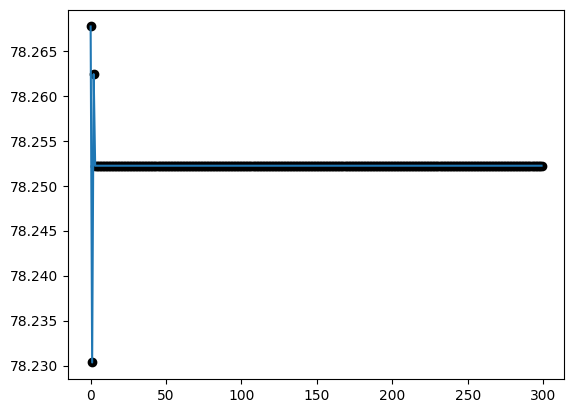

In [31]:
plt.plot(erro_y_lis)
plt.scatter(range(len(erro_y_lis)),erro_y_lis,color="black")
plt.show

In [32]:
theta_1

array([-1.63627107e-02,  1.87830266e-02,  2.71497630e-04, -2.53183475e-04,
       -1.01419107e-04, -1.69136676e-05,  1.79974986e-04,  4.32651838e-05,
       -5.82373380e-05, -2.44139766e-05,  1.26887585e-05,  0.00000000e+00,
       -1.05485891e-04,  0.00000000e+00,  1.93172237e-05,  0.00000000e+00,
        0.00000000e+00,  2.65621215e-05,  2.33452816e-05,  1.61290072e-05,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -2.44283877e-08,  0.00000000e+00,
        0.00000000e+00, -3.40051415e-06,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00])

In [40]:
theta_21

array([ 1.70739193e+01, -8.51270133e-02,  1.16619223e-01, -1.06702356e-01,
       -7.93528170e-02, -5.25759990e-02,  1.50587006e-02,  7.06879124e-02,
        5.87573678e-02, -5.56043762e-02,  1.18460870e-02,  6.42095782e-02,
        5.22915475e-02, -4.33849205e-02,  1.24804800e-02, -4.59767519e-02,
        5.52121142e-02, -3.94189971e-02,  3.21460182e-02, -4.70837277e-02,
       -2.48396657e-02,  5.17458083e-02,  4.12819046e-02,  4.72076794e-02,
        0.00000000e+00, -2.90232276e-02,  4.13060468e-02,  4.41143501e-02,
        2.00488634e-02,  4.42241904e-02, -4.15999401e-02,  2.83033362e-02,
        3.54414714e-02, -3.80637209e-02,  4.70452239e-02, -2.72743270e-02,
        4.46387921e-02,  4.10525943e-02,  4.63395080e-02,  2.25925717e-02])

In [18]:
theta_22

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.])

<function matplotlib.pyplot.show(close=None, block=None)>

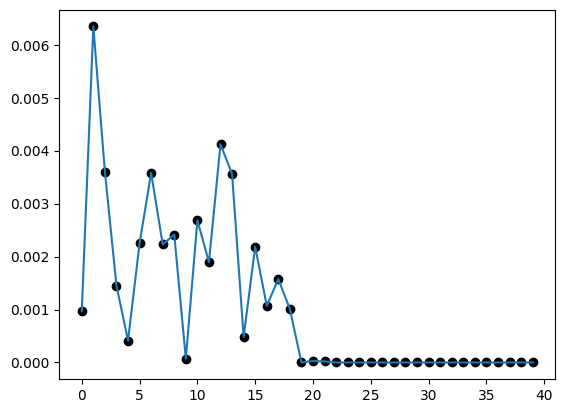

In [19]:
plt.plot(np.absolute(theta_1))
plt.scatter(range(len(theta_1)),np.absolute(theta_1),color="black")
plt.show

In [15]:
plt.plot(np.absolute(theta_21))
plt.scatter(range(len(theta_21)),np.absolute(theta_21),color="black")
plt.show

NameError: name 'theta_21' is not defined

<function matplotlib.pyplot.show(close=None, block=None)>

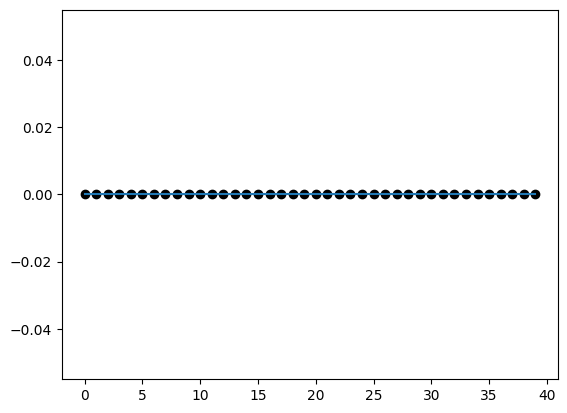

In [21]:
plt.plot(np.absolute(theta_22))
plt.scatter(range(len(theta_22)),np.absolute(theta_22),color="black")
plt.show